In [1]:
from pliers.extractors import merge_results
from pliers.tests.utils import get_test_data_path

Using TensorFlow backend.


In [2]:
from os.path import join
from matplotlib import pyplot as plt

%matplotlib inline

### Face Detection

First use case involves face detection within a single image of Barack Obama's face

In [3]:
from pliers.extractors import FaceRecognitionFaceLocationsExtractor

In [4]:
image = join(get_test_data_path(), 'image', 'obama.jpg')

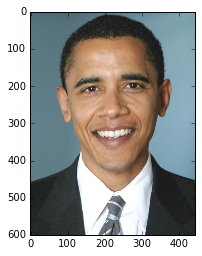

In [6]:
im_mat = plt.imread(image)
plt.imshow(im_mat)

In [5]:
# Initialize Extractor
ext = FaceRecognitionFaceLocationsExtractor()

# Apply Extractor to image
result = ext.transform(image)
result.to_df()

MissingDependencyError: 
face_recognition required to use this transformer, but could not be
successfully imported. Please make sure they are installed.


face_recognition ridiculously hard to download, moving on to other features

In [1]:
from pliers.extractors import GoogleVisionAPIFaceExtractor

ext = GoogleVisionAPIFaceExtractor()
image = join(get_test_data_path(), 'image', 'obama.jpg')
result = ext.transform(image)

result.to_df(format='long', timing=False, object_id=False)

Using TensorFlow backend.


MissingDependencyError: 
googleapiclient, oauth2client.client required to use this transformer, but could not be
successfully imported. Please make sure they are installed.


all face recognition is hopeless, moving on to text

In [2]:
from pliers.stimuli import TextStim, ComplexTextStim
from pliers.extractors import VADERSentimentExtractor, merge_results

raw = """We're not claiming that VADER is a very good sentiment analysis tool.
Sentiment analysis is a really, really difficult problem. But just to make a
point, here are some clearly valenced words: disgusting, wonderful, poop,
sunshine, smile."""

# First example: we treat all text as part of a single token
text = TextStim(text=raw)

ext = VADERSentimentExtractor()
results = ext.transform(text)
results.to_df()

,order,duration,onset,object_id,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,NaN,NaN,NaN,0,0.19,0.51,0.3,0.6787


In [3]:
text = ComplexTextStim(text=raw)

ext = VADERSentimentExtractor()
results = ext.transform(text)

# Because results is a list of ExtractorResult objects
# (one per word), we need to merge the results explicitly.
df = merge_results(results, object_id=False)
df.head(10)

Stim: 48it [00:00, 3875.99it/s]


,class,filename,onset,source_file,stim_name,duration,order,history,VADERSentimentExtractor#sentiment_compound,VADERSentimentExtractor#sentiment_neg,VADERSentimentExtractor#sentiment_neu,VADERSentimentExtractor#sentiment_pos
0,TextStim,NaN,0.0,NaN,text[We],NaN,0,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
1,TextStim,NaN,0.0,NaN,text['re],NaN,1,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
2,TextStim,NaN,0.0,NaN,text[not],NaN,2,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
3,TextStim,NaN,0.0,NaN,text[claiming],NaN,3,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
4,TextStim,NaN,0.0,NaN,text[that],NaN,4,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
5,TextStim,NaN,0.0,NaN,text[VADER],NaN,5,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
6,TextStim,NaN,0.0,NaN,text[is],NaN,6,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
7,TextStim,NaN,0.0,NaN,text[a],NaN,7,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,0.0,0.0
8,TextStim,NaN,0.0,NaN,text[very],NaN,8,ComplexTextStim->ComplexTextIterator/TextStim,0.0000,0.0,1.0,0.0
9,TextStim,NaN,0.0,NaN,text[good],NaN,9,ComplexTextStim->ComplexTextIterator/TextStim,0.4404,0.0,0.0,1.0
